<a href="https://www.facebook.com/codemakerz"><img src="https://scontent.ffjr1-4.fna.fbcdn.net/v/t1.0-9/36189148_736466693143793_2172101683281133568_n.png?_nc_cat=107&_nc_eui2=AeHzxv3SUcQBOfijLP-cEnHkX4z9XQXdeau__2MlErWZ1x07aZ1zx1PzJUDDxL6cpr7oPqYiifggXDptgtP8W5iCoDRjcdILDBYZ5Ig40dqi8Q&_nc_oc=AQmMCNXdzelFB2rdtpk8wN8nC410Wm2yKupYfYS1FxHNejTF0Jhr1G3WIZORKRF3TvFpohMB8Puw29Txxan8CW05&_nc_ht=scontent.ffjr1-4.fna&oh=7b13627e991a4d1b508923041bd7bc22&oe=5D8A7B03" />
</a>
Follow Us:
Facebook: https://www.facebook.com/codemakerz

<h1>Natural Language Processing - Email Ham & Spam</h1>
<h3>As a learner i am also looking for new things, Help us with your suggestion and ideas. </h3>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/spam-and-ham/spam.csv


# Load Data

In [2]:
df_mails = pd.read_csv('/kaggle/input/spam-and-ham/spam.csv',encoding= 'latin-1')

In [3]:
df_mails.head() # HAM - GOOD EMAILS, SPAM - BAD EMAILS

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Missing Values

In [4]:
df_mails.isnull().sum()  #There are no missing value except unnamed column, we dont need those cols.

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# EDA

In [5]:
df_mails.v1.value_counts()  # We can see there are total 747 spam and 4825 ham

ham     4825
spam     747
Name: v1, dtype: int64

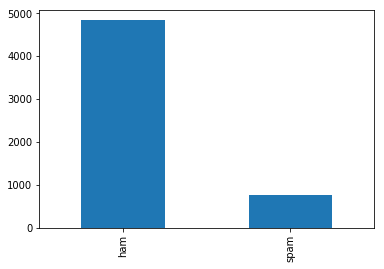

In [6]:
df_mails.v1.value_counts().plot(kind="bar");

In [7]:
# Find most popular spam token
df_spam = df_mails[df_mails.v1 == 'spam']
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN


In [8]:
# Import Spacy for tokenization
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
".".isalpha()

False

In [10]:
spam_token=[]
famous_keyword = []
for spam in np.array(df_spam.v2):
    doc = nlp(spam.lower())
    for token in doc:
        # add famous keywords
        if token.pos_ == "NOUN" or token.pos_ == 'PRON' or token.pos_ == 'PROPN':
            if not token.text in famous_keyword and not token.is_stop and token.text.isalpha():
                famous_keyword.append(token.text)
        # add all spam tokens                              
        if not token.is_stop and not token.text.isdigit() and token.text.isalpha():
            spam_token.append(token.text)

In [11]:
# So these are keywords which u will get usually in spam messages
famous_keyword[0:10]

['entry', 'comp', 'cup', 'tkts', 'text', 'fa', 'txt', 'apply', 'week', 'word']

In [12]:
spam_token[0:10] # so these are most common unique spam keywords

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'text']

In [13]:
# Frequency Distribution
freq_spam = FreqDist(spam_token)
freq_spam

FreqDist({'free': 222, 'txt': 154, 'ur': 144, 'u': 137, 'mobile': 127, 'text': 123, 'stop': 116, 'claim': 113, 'reply': 101, 'prize': 92, ...})

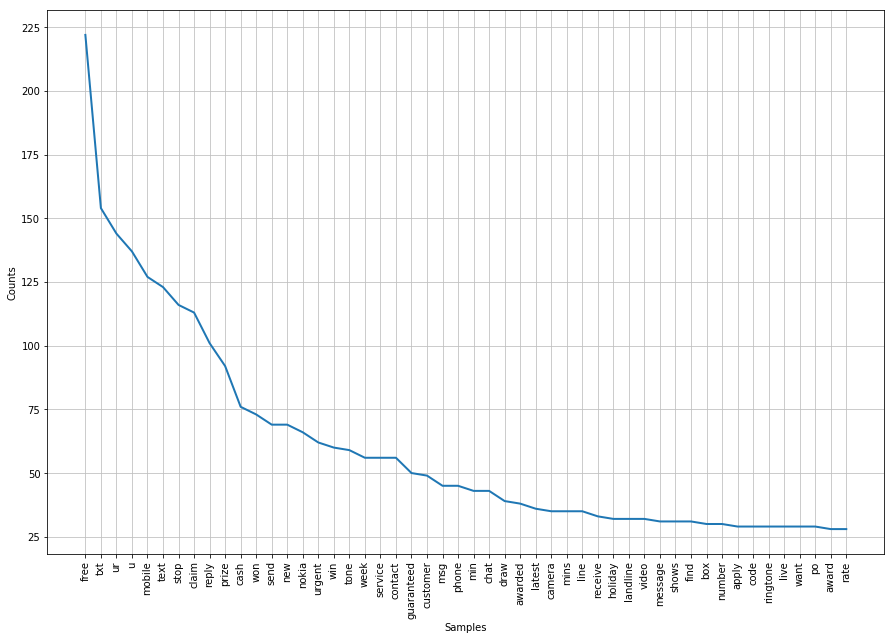

In [14]:
# so we can see that mostly spam keywrods are entry, free, prize, claim which make sense. In regular life when
# you recieve any spam message they include these keywords.
plt.figure(figsize=(15,10))
freq_spam.plot(50)

# Split Train & Test

In [15]:
from sklearn.model_selection import train_test_split
import re # for regula rexpression

In [16]:
# before splitting data we will try to reduce the dimensionality of tfid matrix by filtering stop words and 
# lemmatization.

corpus = []
for i in range(df_mails.shape[0]):
    msg = re.sub('[^a-zA-Z]', ' ', df_mails.v2[i] ) # we will remove all the special characters
    msg = msg.lower() # change it to lower case
    doc = nlp(msg) # create spacy document
    # remove stop words and perform. lemmatization
    tokens_no_stop = [token.lemma_ for token in doc if not token.is_stop and not token.text.isspace()]
    msg = ' '.join(tokens_no_stop) # join all the tokens to make sentence.
    corpus.append(msg) # append to corpus list

In [17]:
# Above whole step is to reduce the dimensionality nd to provide only valid text to you model.
corpus[0:10]

['jurong point crazy available bugi n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st text fa receive entry question std txt rate t c s apply s',
 'u dun early hor u c',
 'nah don t think go usf live',
 'freemsg hey darle s week s word d like fun tb ok xxx std chgs send rcv',
 'brother like speak treat like aid patent',
 'request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner value network customer select receivea prize reward claim claim code kl valid hour',
 'mobile month u r entitle update late colour mobile camera free mobile update co free']

In [18]:
X = corpus # Email
y = df_mails["v1"] # Result Ham or Spam

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=34)

# Term Frequency Inverse Document

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Train Classifier

In [22]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Pipeline

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

# Predict

In [25]:
predictions = text_clf.predict(X_test)

In [26]:
predictions # See prediction is in text form whichis very good. IN other machine learning algorithm we
# need to apply labelencoder.

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

# Confusion Matrix

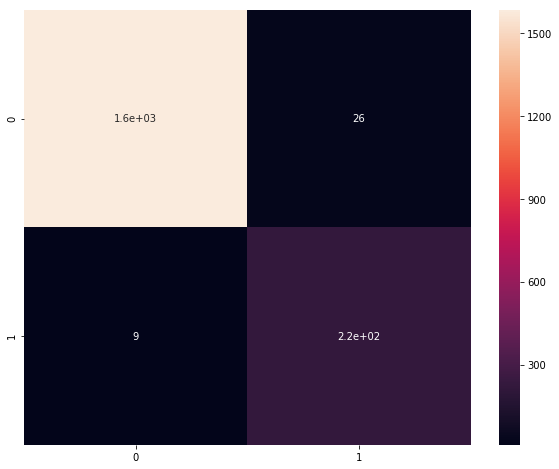

In [27]:
from sklearn import metrics
cm = metrics.confusion_matrix(predictions, y_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True)

# Classification Report

In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1594
        spam       0.96      0.89      0.93       245

    accuracy                           0.98      1839
   macro avg       0.97      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [29]:
# So we can see we are getting a good prediction and recall for both the cases(ham & spam)

# Accuracy

In [30]:
print(metrics.accuracy_score(y_test, predictions)) # we got an accuray of 98% which is really amazing.

0.9809679173463839


# Test New Email

In [31]:
text_clf.predict(["Weekly Lottery Participation. Win upto $10,000."])

array(['spam'], dtype=object)

In [32]:
text_clf.predict(["Hello Sir. How are you?"])

array(['ham'], dtype=object)

In [33]:
# So it is working as we expected. Try some more messages. !!! 
# Thank you... !! UPVOTE if you like the code. 